# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [3]:
lats

array([ 37.92642734, -58.10789919, -66.0721278 , ..., -44.21379569,
       -47.71685374,  88.58741475])

In [4]:
lngs

array([ 91.29256745, 111.75622818, -39.8342832 , ..., -18.20985321,
       -39.50716256, 134.67329425])

In [5]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

In [6]:
cities

['hami',
 'albany',
 'ushuaia',
 'khani',
 'batsfjord',
 'fairbanks',
 'capitao poco',
 'balve',
 'klaksvik',
 'gawler',
 'bluff',
 'cape town',
 'cairns',
 'grand river south east',
 'saint-philippe',
 'torbay',
 'anadyr',
 'pevek',
 'faanui',
 'hazorasp',
 'makakilo city',
 'tarrafal',
 'inhambane',
 'atuona',
 'saleaula',
 'punta arenas',
 'busselton',
 'provideniya',
 'jumla',
 'weatherford',
 'belyy yar',
 'harper',
 'hasaki',
 'bolungarvik',
 'new norfolk',
 'chuy',
 'katsuura',
 'baykit',
 'rikitea',
 'kodiak',
 'bafoulabe',
 'mataura',
 'kununurra',
 'avarua',
 'jamestown',
 'yellowknife',
 'nantucket',
 'knysna',
 'half moon bay',
 'townsville',
 'emirdag',
 'tautira',
 'qaanaaq',
 'axim',
 'bargal',
 'kapaa',
 'vaini',
 'tumannyy',
 'vao',
 'oranjemund',
 'khatanga',
 'arman',
 'bengkulu',
 'barrow',
 'kahului',
 'benguela',
 'jaguariaiva',
 'hermanus',
 'illoqqortoormiut',
 'warqla',
 'okuchi',
 'vilhena',
 'carndonagh',
 'lagoa',
 'castro',
 'esperance',
 'alofi',
 'bredasd

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [8]:
# set up lists to hold reponse info
names = []
city_id = []
coord_lat = []
main_temp_max = [] 
main_humidity = []
clouds = []
wind_speed = []
weather_response = []
lat = []
temp = []
row_count = 1

# Loop through the list of cities and perform a request for data on each
for city in cities:
    weather = requests.get(query_url + city).json()
    
    try:
        names.append(weather['name'])
        city_id.append(weather['id'])
        coord_lat.append(weather['coord']['lat'])
        main_temp_max.append(weather['main']['temp_max'])
        main_humidity.append(weather['main']['humidity'])
        clouds.append(weather['clouds']['all'])
        wind_speed.append(weather['wind']['speed'])
        
        if row_count % 50 ==0:
            time.sleep(30)
        

        
        print(f" Currently processing ID {weather['id']}:  {weather['name']}")
    except (KeyError):
        print("Skipping over a value we don't want.")

 Currently processing ID 1529484:  Hami
 Currently processing ID 5106834:  Albany
 Currently processing ID 3833367:  Ushuaia
 Currently processing ID 610864:  Khani
 Currently processing ID 780717:  Batsfjord
 Currently processing ID 5861897:  Fairbanks
 Currently processing ID 3403127:  Capitao Poco
 Currently processing ID 2953003:  Balve
 Currently processing ID 2618795:  Klaksvik
 Currently processing ID 2071059:  Gawler
 Currently processing ID 2175403:  Bluff
 Currently processing ID 3369157:  Cape Town
 Currently processing ID 2172797:  Cairns
Skipping over a value we don't want.
 Currently processing ID 6138908:  Saint-Philippe
 Currently processing ID 6167817:  Torbay
 Currently processing ID 2127202:  Anadyr
 Currently processing ID 2122090:  Pevek
 Currently processing ID 4034551:  Faanui
 Currently processing ID 1513957:  Hazorasp
 Currently processing ID 5850554:  Makakilo City
 Currently processing ID 3374166:  Tarrafal
 Currently processing ID 1045114:  Inhambane
 Curren

 Currently processing ID 1848373:  Fukue
 Currently processing ID 2347758:  Bara
 Currently processing ID 3664716:  Canutama
 Currently processing ID 4372777:  Vardo
 Currently processing ID 908913:  Luwingu
 Currently processing ID 3403687:  Camocim
 Currently processing ID 3933874:  Oxapampa
 Currently processing ID 3424607:  Tasiilaq
 Currently processing ID 2278158:  Buchanan
Skipping over a value we don't want.
 Currently processing ID 2013279:  Vostok
 Currently processing ID 2194098:  Ahipara
 Currently processing ID 2240449:  Luanda
 Currently processing ID 2396853:  Omboue
 Currently processing ID 6089245:  Norman Wells
 Currently processing ID 1651810:  Airai
Skipping over a value we don't want.
 Currently processing ID 5960603:  Geraldton
 Currently processing ID 2151437:  Rockhampton
 Currently processing ID 2015852:  Svetlaya
 Currently processing ID 1572151:  Nha Trang
 Currently processing ID 3395458:  Maragogi
 Currently processing ID 499717:  Rzhev
 Currently processin

 Currently processing ID 2732265:  Viseu
 Currently processing ID 3932145:  Pisco
 Currently processing ID 1492110:  Shitkino
 Currently processing ID 1812427:  Dongkan
 Currently processing ID 2092164:  Lorengau
 Currently processing ID 6063191:  Mackenzie
 Currently processing ID 3985710:  Cabo San Lucas
Skipping over a value we don't want.
 Currently processing ID 3466165:  Cidreira
 Currently processing ID 1641899:  Labuhan
 Currently processing ID 4923531:  Michigan City
 Currently processing ID 6111862:  Port Hardy
 Currently processing ID 4589590:  Totness
 Currently processing ID 212902:  Kindu
 Currently processing ID 2396518:  Port-Gentil
 Currently processing ID 2067070:  Palmer
 Currently processing ID 2121025:  Srednekolymsk
 Currently processing ID 1815395:  Chaozhou
 Currently processing ID 3026260:  La Trinite
 Currently processing ID 610416:  Batamshinskiy
 Currently processing ID 7626384:  Hovd
 Currently processing ID 3472473:  Alto Araguaia
 Currently processing ID 

 Currently processing ID 1253628:  Dunda
 Currently processing ID 515873:  Oktyabrskiy
Skipping over a value we don't want.
 Currently processing ID 3391387:  Porto de Moz
Skipping over a value we don't want.
 Currently processing ID 463655:  Zenzeli
 Currently processing ID 2122614:  Okha
 Currently processing ID 2339937:  Auki
 Currently processing ID 1259385:  Port Blair
 Currently processing ID 5859699:  College
 Currently processing ID 2138522:  Poya
 Currently processing ID 4832074:  Lena
 Currently processing ID 1808857:  Hanzhong
 Currently processing ID 6453395:  Halden
 Currently processing ID 3141667:  Roald
Skipping over a value we don't want.
Skipping over a value we don't want.
 Currently processing ID 3894426:  Coihaique
 Currently processing ID 2030065:  Mandalgovi
 Currently processing ID 475955:  Velizh
 Currently processing ID 672024:  Ocna Mures
 Currently processing ID 7064006:  Tongchuan
 Currently processing ID 3622854:  Miramar
 Currently processing ID 3939761: 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
weather_df = pd.DataFrame(list(zip(names, city_id, coord_lat, main_temp_max, main_humidity, clouds, wind_speed)), 
                          columns = [
                              
                              'City',
                              'City ID',
                              'Latitude',
                              'Max Temp',
                              'Humidity',
                              'Cloudiness',
                              
                              'Wind Speed']) 


weather_df.to_csv  ("../cities.csv")
weather_df.head()

,City,City ID,Latitude,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hami,1529484,42.84,34.11,12,36,0.76
1,Albany,5106834,42.65,22.00,68,20,1.50
2,Ushuaia,3833367,-54.81,4.00,93,75,1.50
3,Khani,610864,41.96,27.00,54,0,1.50
4,Batsfjord,780717,70.63,6.91,84,100,4.20


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [ ]:
#Latitude vs. Temperature Plot

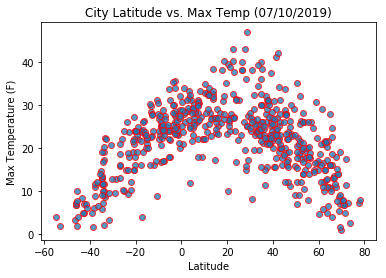

In [27]:
#Build a scatter plot for each data type
plt.scatter(weather_df["Latitude"], weather_df["Max Temp"], edgecolor = "red", alpha = 0.75)


plt.title("City Latitude vs. Max Temp (07/10/2019)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")


#Save Figure
plt.savefig("LatitudevsMaxTemp.png" )

#Show plot
plt.show()



#### Latitude vs. Humidity Plot

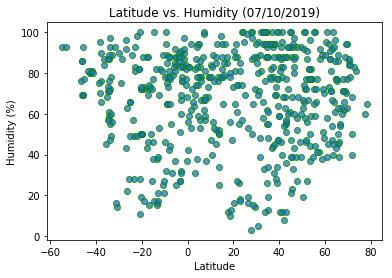

In [29]:
#Build the scatter plot for each data type
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], edgecolor = "green", alpha = 0.75)

        

plt.title("Latitude vs. Humidity (07/10/2019)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

#Save Figure
plt.savefig("LatitudevsHumidity.png")

#Show plot
plt.show()



#### Latitude vs. Cloudiness Plot

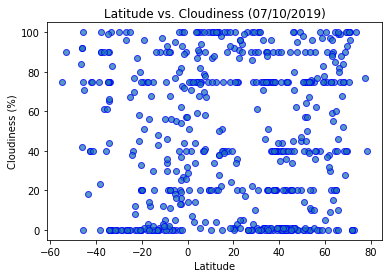

In [31]:
#Build the scatter plot for each data type
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"], edgecolor = "blue", alpha = 0.75)

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Latitude vs. Cloudiness (07/10/2019)")

#Save Figure
plt.savefig("LatitudevsCloudiness.png" )

#Show plt
plt.show()



#### Latitude vs. Wind Speed Plot

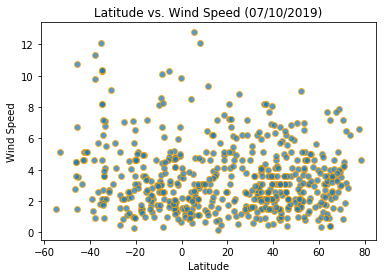

In [32]:
#Build the scatter plot for each data type
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"], edgecolor = "orange", alpha = 0.75)

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed (07/10/2019)")

#Save Figure
plt.savefig("LatitudevsWindSpeed.png")

#Show plot
plt.show()

